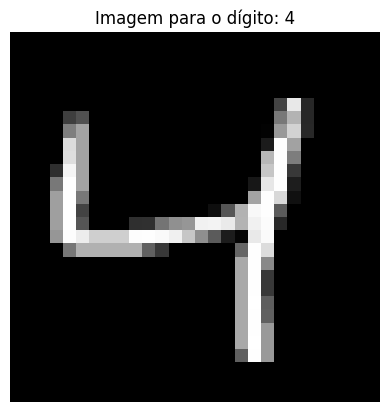

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         1,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,902 (11.34 KB)

 Trainable params: 2,902 (11.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0982 - loss: 2.3053 - val_accuracy: 0.0938 - val_loss: 2.2982
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1040 - loss: 2.3017 - val_accuracy: 0.1024 - val_loss: 2.2953
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1045 - loss: 2.3006 - val_accuracy: 0.1128 - val_loss: 2.2927
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1122 - loss: 2.2974 - val_accuracy: 0.1198 - val_loss: 2.2901
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1114 - loss: 2.2953 - val_accuracy: 0.1267 - val_loss: 2.2877


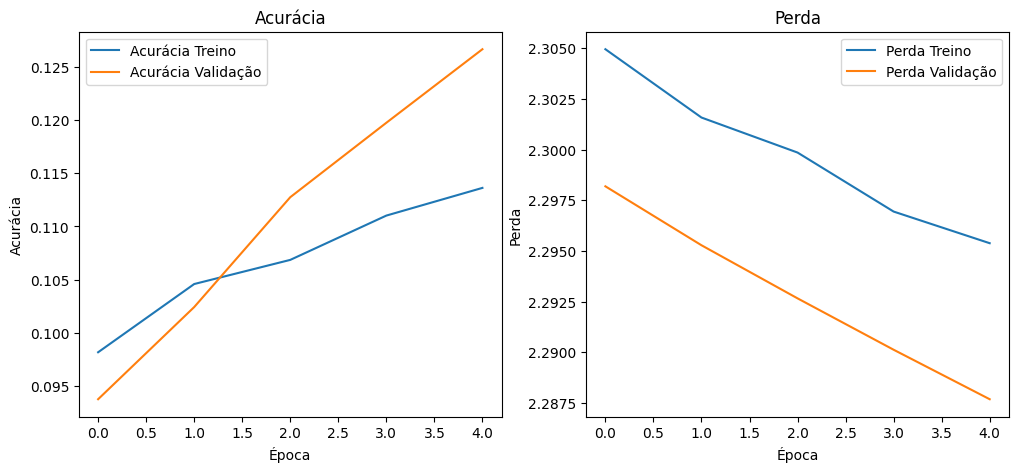

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1434 - loss: 2.2867
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


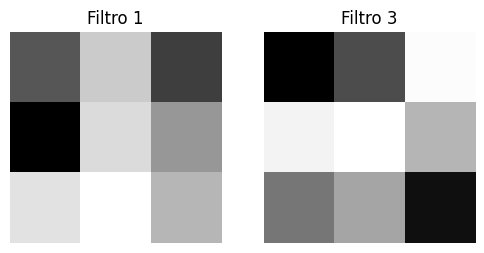

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Carregar dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plotar imagem índice 2 (igual no R)
index_image = 2
plt.imshow(x_train[index_image], cmap='gray')
plt.title(f"Imagem para o dígito: {y_train[index_image]}")
plt.axis('off')
plt.show()

# Parâmetros
batch_size = 64
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28

# Redimensionar para formato esperado pela CNN
x_train = x_train.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255
x_test = x_test.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255

# One-hot encoding das labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Definir modelo
model = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

# Compilar modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Treinar modelo
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

# Plotar histórico do treinamento (acurácia e perda)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()

# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predição nos dados de teste (exemplo: primeiras 50)
predictions = model.predict(x_test)

# Pegar os pesos da primeira camada convolucional
filters, biases = model.layers[0].get_weights()

# Visualizar filtros 1 e 3 da primeira camada (igual ao R)
plt.figure(figsize=(6,3))
for i, filtro_id in enumerate([0, 2]):
    filtro = filters[:, :, 0, filtro_id]
    plt.subplot(1, 2, i+1)
    plt.imshow(filtro, cmap='gray')
    plt.title(f'Filtro {filtro_id + 1}')
    plt.axis('off')
plt.show()
